# 신경망학습

## 수치미분을 계산하고 접선을 구한 후 시각화 하는 프로그램

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def numerical_diff(f,x): #수치 미분함수 numerical_diff 함수는 함수 f의 x에서의 수치 미분 값을 계산합니다.
    h = 1e-4 #0.0001 #h는 작은 값으로, 중앙차분 방식으로 기울기를 구합니다.
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x): # 함수 정의 
    return 0.01*x**2 + 0.1*x #function_1은 이차 함수로, 0.01 * x**2 + 0.1 * x를 반환합니다.

def tangent_line(f,x): #tangent_line 함수는 주어진 함수 f와 x에서의 접선을 계산합니다.
    d = numerical_diff(f,x) #d는 x에서의 기울기(미분 값)입니다.
    print(d)
    y = f(x) - d*x #y는 접선의 y 절편(intercept)입니다.
    return lambda t: d*t + y #이 함수는 접선의 방정식 d * t + y를 반환합니다.

#데이터 생성 및 그래프 설정정
x= np.arange(0.0, 20.0, 0.1) #x는 0.0부터 20.0까지 0.1 간격의 값들로 이루어진 배열입니다.
y = function_1(x) #y는 function_1을 사용하여 계산된 값들입니다.
plt.xlabel("x") #그래프의 x축과 y축 레이블을 설정합니다.
plt.ylabel("f(x)")

#접선 계산 및 시각화 
tf = tangent_line(function_1, 5) #tf는 function_1 함수의 x = 5에서의 접선입니다.
y2 = tf(x) #y2는 접선 방정식을 사용하여 계산된 값들입니다.

plt.plot(x, y) #원래 함수 y와 접선 y2를 그래프에 플로팅하고 시각화합니다.
plt.plot(x, y2)
plt.show()

## 수치미분을 사용하여 기울기 구한 후 그래프로 시각화하기

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1

C:\Users\USER\AppData\Local\Temp\ipykernel_13016\1290377341.py:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


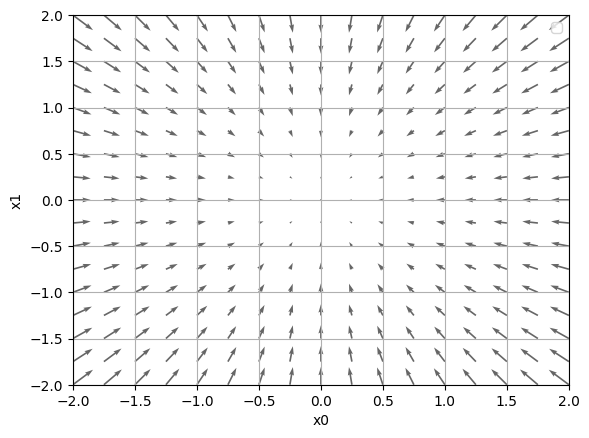

In [1]:
# coding: utf-8

import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

# 수치 미분함수
def _numerical_gradient_no_batch(f,x):
    h = 1e-4  #h는 작은 값으로, 중앙차분 방식으로 기울기를 구합니다.
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx] #각 요소 x[idx]에 대해 함수 f의 기울기를 계산합니다

        #f(x+h)계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        #f(x-h)계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h) #계산된 기울기를 grad 배열에 저장합니다.
        x[idx] = tmp_val #값 복원

    return grad 

#수치미분 함수수
def numerical_gradient(f, X):
    if X.ndim == 1: #X가 1차원 배열일 경우 _numerical_gradient_no_batch 함수를 호출합니다.
        return _numerical_gradient_no_batch(f, X) 
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X): #그렇지 않을 경우, 각 요소에 대해 _numerical_gradient_no_batch 함수를 호출하여 기울기를 계산합니다
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad

#함수 정의 
def function_2(x): #x의 각 요소에 대한 제곱의 합을 계산하는 함수입니다.
    if x.ndim == 1: #x가 1차원 배열이면 np.sum(x**2)을 반환하고, 그렇지 않으면 축을 따라 합을 구하여 반환합니다.
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

#접선 구하는 함수 
def tangent_line(f, x):
    d= numerical_gradient(f,x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t +y

#메인 블록 
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1) #x0와 x1 값을 사용하여 2차원 그리드를 생성합니다

    X = X.flatten() #X와 Y는 평탄화된 배열로, 모든 점의 좌표를 나타냅니다.
    Y = Y.flatten() 

    print(X)
    print(Y)

    grad = numerical_gradient(function_2, np.array([X, Y])) #numerical_gradient 함수를 사용하여 각 점에서의 기울기를 계산합니다.
    print(grad)

    plt.figure()
    #plt.quiver를 사용하여 계산된 기울기를 화살표로 시각화합니다.
    plt.quiver(X,Y, -grad[0], -grad[1], angles="xy", color="#666666") #,headwidth=10, scale=40, color="#444444" 
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

## 2차원 함수의 기울기 구하고 경사하강법을 사용하여 최적화 하는 과정

c:\Users\USER\Desktop\인공신경망기초\py


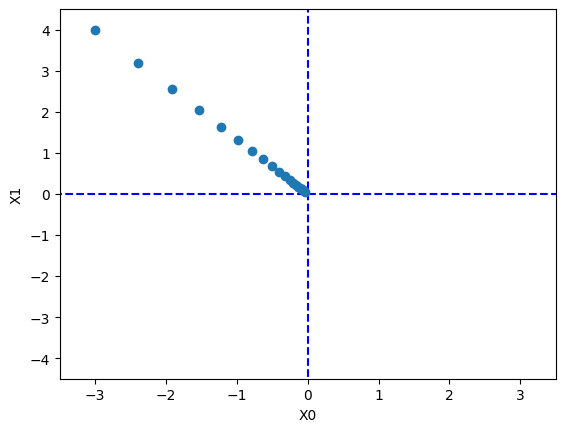

In [2]:
# coding: utf-8

# coding: utf-8
import os, sys
print(os.getcwd())

import numpy as np
import matplotlib.pylab as plt

#from gradient_2d import numerical_gradient
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x [idx] = tmp_val - h
        fxh2 = f(x)
        
        grad [idx]=(fxh1-fxh2) /(2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X) :
            grad [idx] = _numerical_gradient_no_batch(f, x)
            return grad
#기울기 하강법 
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)

def function_2(x):
    return x[0] ** 2 +x[1] ** 2

init_x = np.array([-3.0, 4.0])
#초기 점, 학습률 및 반복 횟수를 설정하고, 기울기 하강법을 실행합니다.
lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, \
step_num=step_num)


plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

## 간단한 신경망 모델을 정의하고, 주어진 입력과 타겟 값에 대해 기울기를 계산하는 과정

In [8]:
# coding: utf-8

import sys, os

print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) #정규분포로 초기화

    def predict(self,x):
        return np.dot(x,self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)


c:\Users\USER
c:\Users


ModuleNotFoundError: No module named 'common.functions'